<a href="https://colab.research.google.com/github/rifkifauzi24/Churn-Analysis/blob/main/Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Analysis (Data Science Project)

# 1.&nbsp;Import relevant libraries

In [ ]:
# Import relevant libraries

# Standard libraries for data analysis:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm, skew


# sklearn modules for data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# sklearn modules for Model Selection
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, GridSearchCV, ShuffleSplit, KFold

#Standard libraries for data visualization

import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix

# Miscellaneous Utilitiy Libraries
import random
from datetime import datetime
import string

# 2.&nbsp;Import dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the dataset
file_dir = '/content/drive/MyDrive/Data Science - Digital Skola/Dataset/Conqueror Project I/customer_churn_data.csv'
dataset = pd.read_csv(file_dir)

# Read Dataset
display(dataset)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 3.&nbsp;Evaluate Data Structure

In [ ]:
# Evaluate data structure
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
dataset.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
# Recheck Column Datatypes and Missing Values:

data_desc = (
    dataset
    .columns
    .to_series()
    .groupby(dataset.dtypes)
    .groups.items()
)

for dtype, columns in data_desc:
    print(f"{dtype}:")
    for col in columns:
        print(f"  - {col}")

int64:
  - SeniorCitizen
  - tenure
float64:
  - MonthlyCharges
object:
  - customerID
  - gender
  - Partner
  - Dependents
  - PhoneService
  - MultipleLines
  - InternetService
  - OnlineSecurity
  - OnlineBackup
  - DeviceProtection
  - TechSupport
  - StreamingTV
  - StreamingMovies
  - Contract
  - PaperlessBilling
  - PaymentMethod
  - TotalCharges
  - Churn


In [ ]:
# check missing values
dataset.isna().any()

,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


In [ ]:
def unique_categorical_values(dataset, column_name):
    """
    Prints the number and list of unique values for a specified
    categorical column in a Pandas DataFrame.

    Args:
        dataset (pd.DataFrame): The Pandas DataFrame.
        column_name (str): The name of the categorical column.
    """
    try:
        print(f"Number of unique {column_name}: {dataset[column_name].nunique()}")
        print(f"Unique {column_name}:")
        for value in dataset[column_name].unique():
            print(f"- {value}")
    except KeyError:
        print(f"Error: Column '{column_name}' not found in the dataset.")

In [ ]:
unique_categorical_values(dataset, "PaymentMethod")

Number of unique PaymentMethod: 4
Unique PaymentMethod:
- Electronic check
- Mailed check
- Bank transfer (automatic)
- Credit card (automatic)


In [ ]:
unique_categorical_values(dataset, "Contract")

Number of unique Contract: 3
Unique Contract:
- Month-to-month
- One year
- Two year


In [ ]:
# "TotalCharges" is not categorical columns
# unique_categorical_values(dataset, "TotalCharges")

# 4.&nbsp;Check Target Variable Distribution

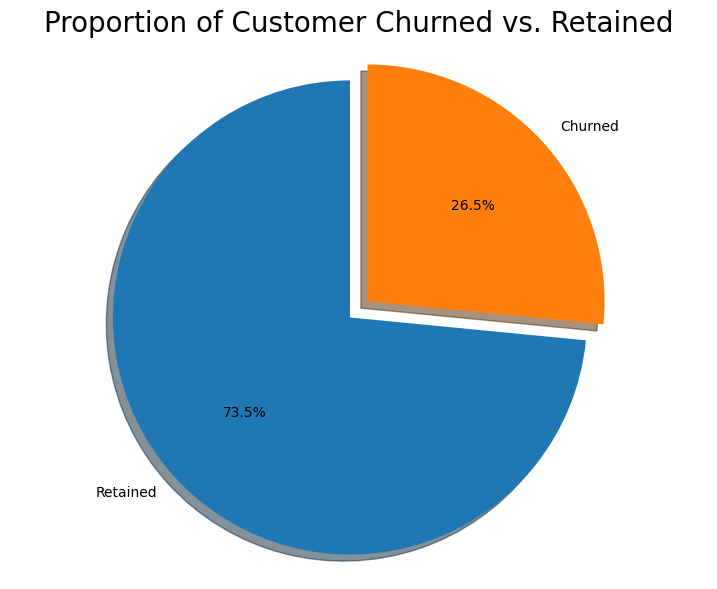

In [ ]:
target_column = 'Churn'
labels = ['Retained', 'Churned']

sizes = [
    dataset[target_column][dataset[target_column]=="No"].count(), #Retained
    dataset[target_column][dataset[target_column]=="Yes"].count() #Churn
]

explode = (0, 0.1)
fig, ax = plt.subplots(figsize=(9, 7))
ax.pie(
    x=sizes,
    explode=explode,
    labels=labels, autopct='%1.1f%%',
    shadow=True, startangle=90
)

ax.axis('equal')
plt.title("Proportion of Customer Churned vs. Retained", size=20)
plt.show()

What happen here?

Answer:

Dataset ini sedikit tidak seimbang (imbalanced dataset), karena jumlah pelanggan yang tidak churn jauh lebih banyak daripada yang churn.
Jika kita menggunakan data ini untuk machine learning, model bisa cenderung bias terhadap kelas mayoritas ("No")/Retained.

# 5.&nbsp;Clean the Dataset

In [ ]:
dataset["TotalCharges"]

,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.5
7039,7362.9
7040,346.45
7041,306.6


In [ ]:
# Clean the Dataset
dataset["TotalCharges"] = pd.to_numeric(
    dataset["TotalCharges"],
    errors='coerce'
)

dataset["TotalCharges"] = dataset["TotalCharges"].astype("float")

In [ ]:
dataset.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
dataset.isna().any()

,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


In [ ]:
# Take care of missing data
# Find the mean/median (if numerical) or mode (if categorical) and fill missing values of each columns programmatically.

# median: if the data distribution is skewed
# mean: if the data distribution looks like normal distribution

# Identify columns with missing values
na_cols = dataset.columns[dataset.isna().any()].tolist()

# Iterate through columns with missing values
for col in na_cols:
    if pd.api.types.is_numeric_dtype(dataset[col]):
        # Fill numeric columns with the median/mean
        dataset[col] = dataset[col].fillna(dataset[col].median())
    else:
        # Fill non-numeric columns with the mode
        dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

In [ ]:
dataset.isna().any()

,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


# 6.&nbsp;Label Encode Binary Data

In [ ]:
# Label Encode Binary data

# Create a LabelEncoder object
le = LabelEncoder()

# Identify columns with 2 or fewer unique values and are of object type
binary_cols = [col for col in dataset.columns[1:] if dataset[col].dtype == 'object' and len(dataset[col].unique()) <= 2]

# Label encode the identified columns
for col in binary_cols:
    dataset[col] = le.fit_transform(dataset[col])

print(f"{len(binary_cols)} columns were label encoded.")

6 columns were label encoded.


In [ ]:
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
dataset['MultipleLines'].value_counts()

,count
MultipleLines,
No,3390
Yes,2971
No phone service,682


# 7.&nbsp;Exploratory Data Analysis

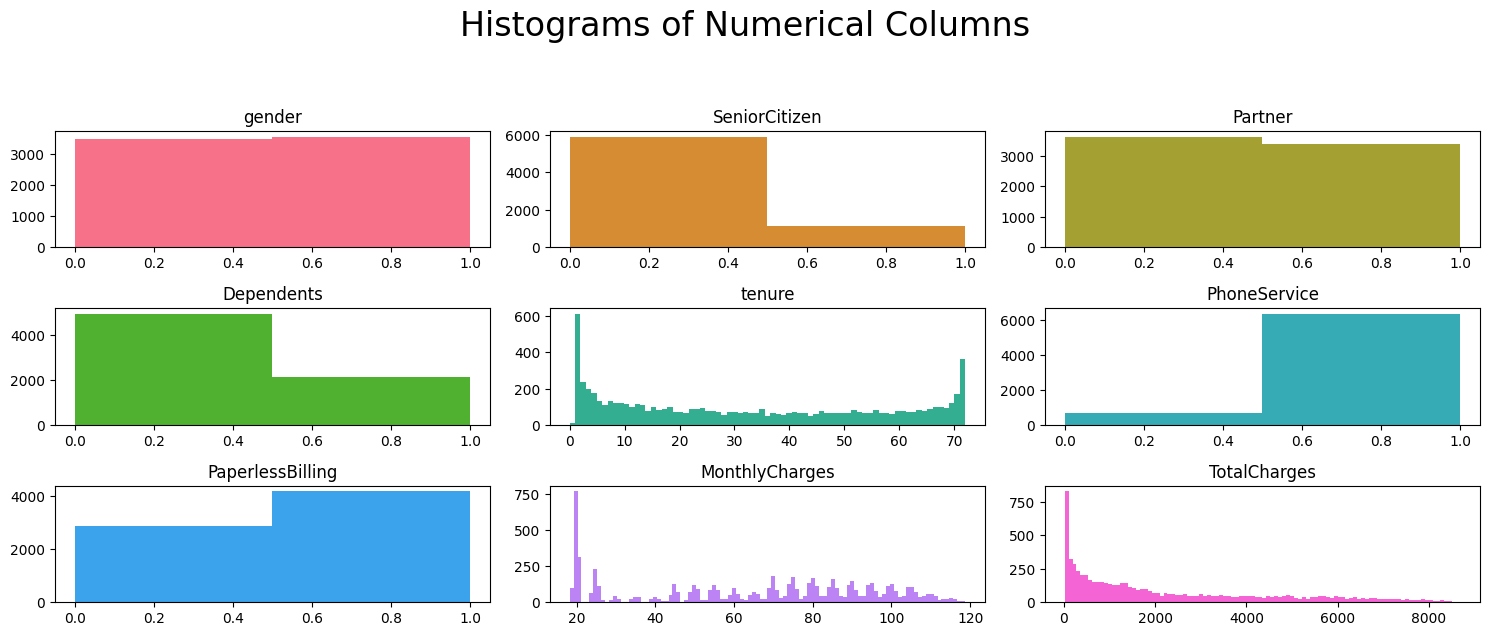

In [ ]:
# Exploratory Data Analysis

# Plot Histogram of numeric Columns
num_cols = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'tenure',
    'PhoneService',
    'PaperlessBilling',
    'MonthlyCharges',
    'TotalCharges'
]
dataset2 = dataset[num_cols]

# Define a color palette with distinct colors
palette = sns.color_palette("husl", len(num_cols))

# Histogram:
fig = plt.figure(figsize=(15, 12))
plt.suptitle(
    'Histograms of Numerical Columns',
    horizontalalignment="center",
    fontstyle="normal",
    fontsize=24,
    fontfamily="sans-serif"
)

for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    # Use the color palette for each subplot
    plt.hist(
        dataset2.iloc[:, i],
        bins=vals,
        color=palette[i]
    )

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
dataset['gender'].value_counts(normalize=True)

,proportion
gender,
1,0.504756
0,0.495244


What are the insights from diagram above?


Answer:
1. Mayoritas pelanggan bukan senior dan tidak memiliki tanggungan.
2. Banyak pelanggan dengan tenure rendah, yang bisa terkait dengan churn.
3. Sebagian besar pelanggan menggunakan layanan telepon dan lebih memilih paperless billing.
4. Distribusi biaya bulanan bervariasi, tetapi banyak pelanggan berada di kisaran rendah hingga menengah.
5. Total biaya berlangganan meningkat seiring waktu, dengan lonjakan pelanggan baru.

## 7.1 Analyze distribution of Key Categorical Variables

In [ ]:
dataset['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
# Distribution of Contract Type
contract_split = dataset[[ "customerID", "Contract"]]
sectors = contract_split.groupby ("Contract")
contract_split = pd.DataFrame(sectors["customerID"].count())

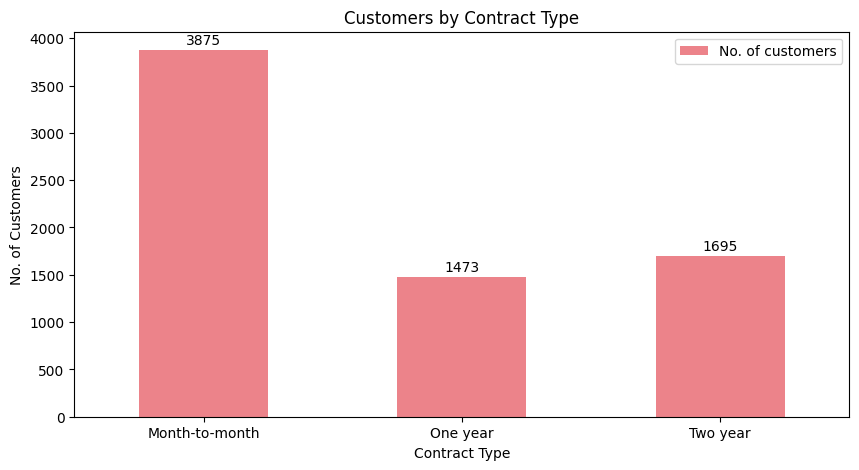

In [ ]:
# Distribution of Contract Type
contract_split = dataset[[ "customerID", "Contract"]]
sectors = contract_split.groupby ("Contract")
contract_split = pd.DataFrame(sectors["customerID"].count())
contract_split.rename(
    columns={'customerID':'No. of customers'},
    inplace=True
)

ax = contract_split[["No. of customers"]].plot.bar(
    title='Customers by Contract Type',
    legend=True,
    table=False,
    grid=False,
    subplots=False,
    figsize=(10, 5),
    color='#ec838a',
    stacked=False
)

plt.ylabel(
    'No. of Customers',
    horizontalalignment="center",
    fontstyle="normal",
    fontfamily="sans-serif"
)
plt.xlabel(
    'Contract Type',
    horizontalalignment="center",
    fontstyle="normal",
    fontfamily="sans-serif"
)
plt.title(
    'Customers by Contract Type',
    horizontalalignment="center",
    fontstyle="normal",
    fontfamily="sans-serif"
)

plt.legend(loc='upper right')
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(contract_split[["No. of customers"]])

def add_value_labels(ax, spacing=2):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)

add_value_labels(ax)

What can be derived from above diagram?

Answer:

1. Mayoritas pelanggan menggunakan kontrak bulanan (Month-to-month) dengan jumlah 3,875 pelanggan.
2. Pelanggan dengan kontrak satu tahun jauh lebih sedikit (1,473 pelanggan).
3. Pelanggan dengan kontrak dua tahun sedikit lebih banyak dibandingkan satu tahun, tetapi masih jauh lebih sedikit dibandingkan kontrak bulanan (1,695 pelanggan).




Perusahaan mungkin perlu mendorong lebih banyak pelanggan untuk memilih kontrak jangka panjang guna mengurangi churn.

Analisis churn berdasarkan jenis kontrak bisa dilakukan untuk melihat apakah pelanggan kontrak bulanan memiliki tingkat churn lebih tinggi dibandingkan pelanggan kontrak satu atau dua tahun.


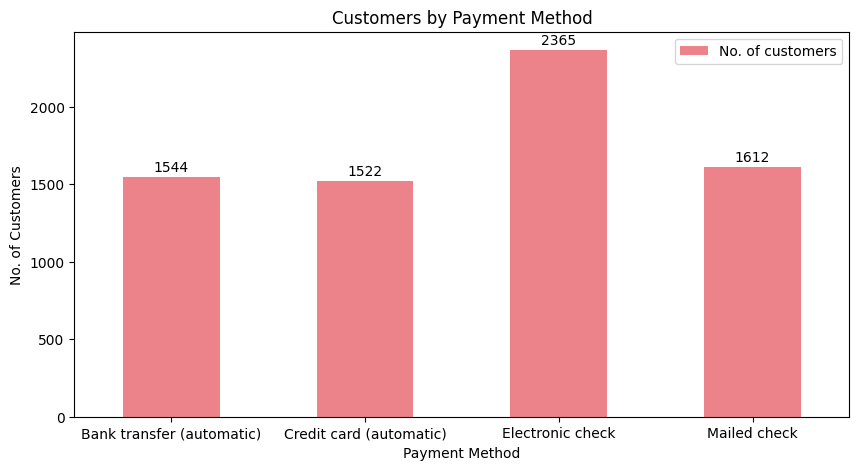

In [ ]:
# Distribution of Payment Method Type

payment_method_split = dataset[[ "customerID", "PaymentMethod"]]
sectors = payment_method_split.groupby ("PaymentMethod")
payment_method_split = pd.DataFrame(sectors["customerID"].count())
payment_method_split.rename(
    columns={'customerID':'No. of customers'},
    inplace=True
)

ax = payment_method_split[["No. of customers"]].plot.bar(
    title='Customers by Payment Method',
    legend=True,
    table=False,
    grid=False,
    subplots=False,
    figsize=(10, 5),
    color='#ec838a',
    stacked=False
)

plt.ylabel(
    'No. of Customers',
    horizontalalignment="center",
    fontstyle="normal",
    fontfamily="sans-serif"
)
plt.xlabel(
    'Payment Method',
    horizontalalignment="center",
    fontstyle="normal",
    fontfamily="sans-serif"
)
plt.title(
    'Customers by Payment Method',
    horizontalalignment="center",
    fontstyle="normal",
    fontfamily="sans-serif"
)
plt.legend(loc='upper right')
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(payment_method_split[["No. of customers"]])

def add_value_labels(ax, spacing=2):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)

add_value_labels(ax)

What can be derived from above diagram?

Answer:

1. Metode pembayaran yang paling banyak digunakan adalah "Electronic check", dengan 2,365 pelanggan.
2. Metode pembayaran otomatis seperti "Bank transfer (1,544 pelanggan)" dan "Credit card (1,522 pelanggan)" memiliki jumlah yang lebih rendah dibandingkan electronic check.
3. "Mailed check" digunakan oleh 1,612 pelanggan, sedikit lebih tinggi dibandingkan transfer bank dan kartu kredit otomatis.

Pelanggan yang menggunakan "Electronic check" mungkin memiliki tingkat churn lebih tinggi, karena pembayaran manual bisa lebih mudah dihentikan.

Perusahaan bisa mendorong pelanggan untuk beralih ke metode pembayaran otomatis guna meningkatkan retensi dan mengurangi churn.

Perlu dilakukan analisis lebih lanjut terkait hubungan antara metode pembayaran dan churn rate untuk memastikan apakah ada korelasi yang signifikan.

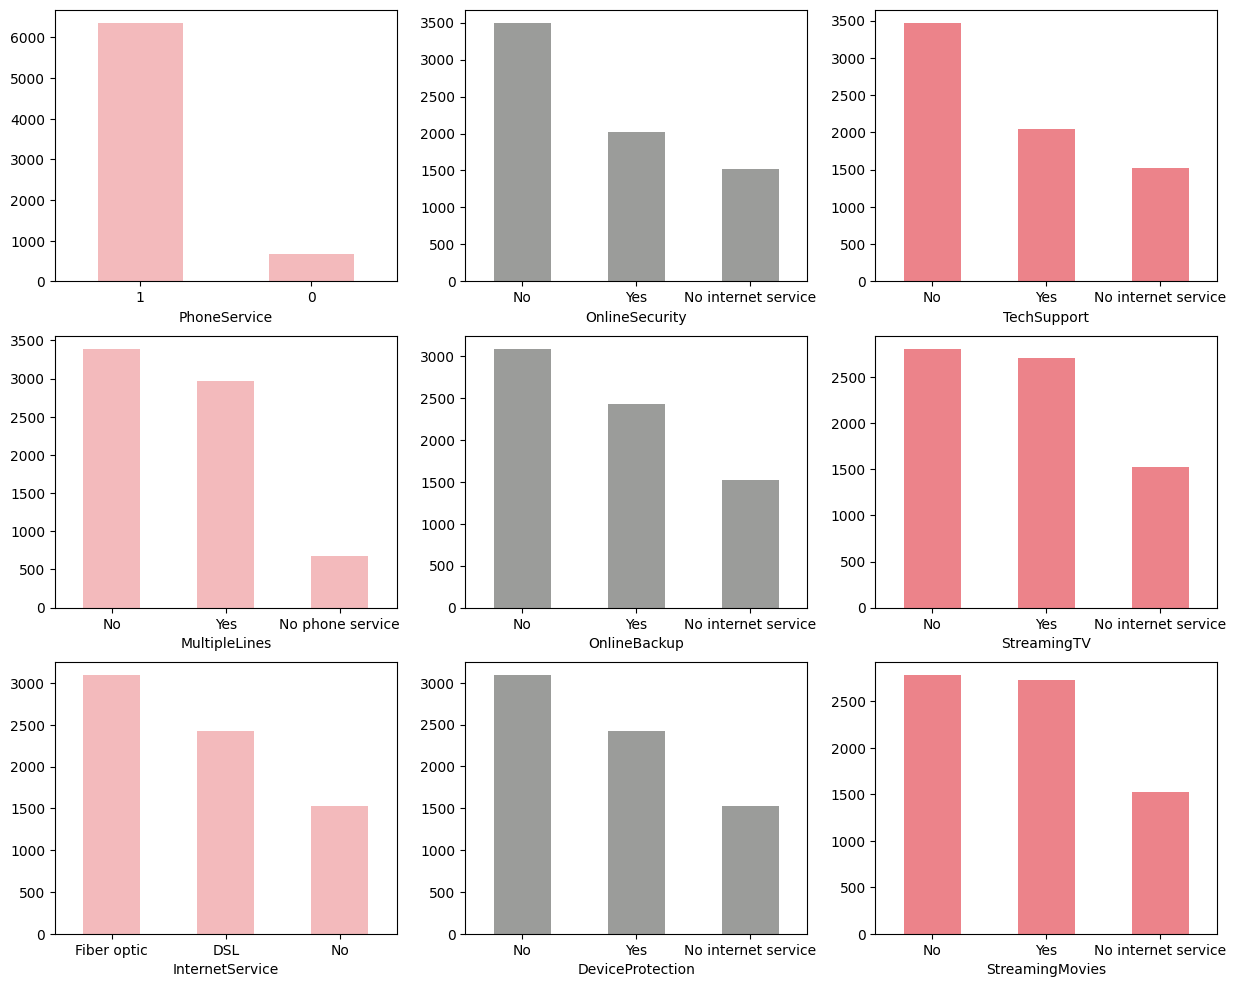

In [ ]:
# Distribution of various Label Encoded Categorical Variables

services = [
    'PhoneService','MultipleLines',
    'InternetService','OnlineSecurity',
    'OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV',
    'StreamingMovies'
]

fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(15,12)
)

for i, item in enumerate(services):
    if i < 3:
        ax = dataset[item].value_counts().plot(
            kind='bar', ax=axes[i, 0],
            rot=0, color='#f3babc'
        )

    elif i >= 3 and i < 6:
        ax = dataset[item].value_counts().plot(
            kind='bar', ax=axes[i-3, 1],
            rot=0, color ='#9b9c9a'
        )

    elif i < 9:
        ax = dataset[item].value_counts().plot(
            kind='bar', ax=axes[i-6, 2],
            rot=0, color='#ec838a'
        )

## 7.2 What are the insights from above diagrams? (Task 1!)

Supposed to be blank!

Answer:

1. Peluang Upselling: Banyak pelanggan tidak menggunakan layanan tambahan seperti keamanan online, backup, atau proteksi perangkat. Perusahaan bisa menawarkan paket bundling atau promosi untuk meningkatkan adopsi layanan ini.

2. Churn & Layanan Tambahan: Perlu dianalisis lebih lanjut apakah pelanggan tanpa layanan tambahan lebih cenderung untuk churn dibandingkan pelanggan yang mengambil paket lengkap.

3. Dukungan Teknis: Rendahnya langganan dukungan teknis bisa menjadi tantangan jika pelanggan mengalami masalah layanan, sehingga perusahaan bisa mempertimbangkan program edukasi atau diskon untuk meningkatkan adopsi layanan ini.

4. Layanan Streaming: Bisa ada strategi pemasaran untuk menarik pelanggan non-streaming agar mulai menggunakan layanan ini, terutama yang sudah memiliki internet service tetapi belum memanfaatkannya secara penuh.

## 7.3 Analyze Churn Rate by Categorical variables

<ipython-input-29-adec50ee61a7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_rate["churn_label"] = pd.Series(


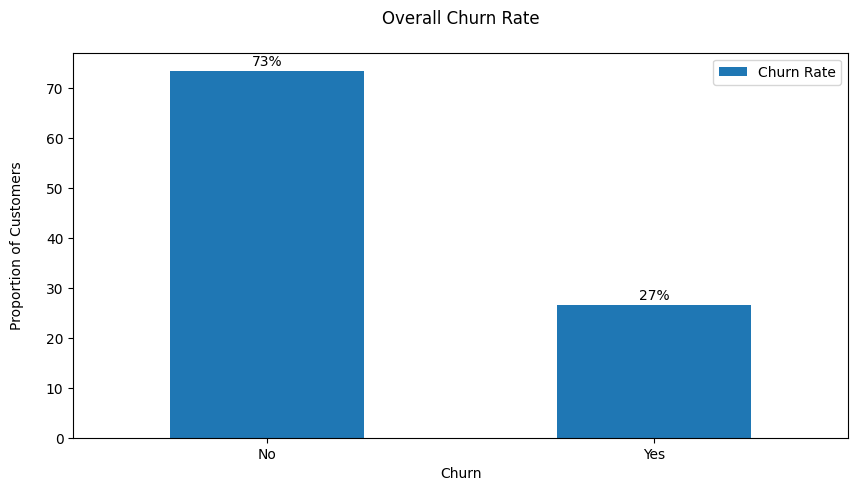

In [ ]:
# Analyze Churn Rate by Categorical variables:

#(1) Overall Churn Rate
import matplotlib.ticker as mtick
churn_rate = dataset[["Churn","customerID"]]
churn_rate["churn_label"] = pd.Series(
    np.where((churn_rate["Churn"] == 0), "No", "Yes")
)

sectors = churn_rate.groupby("churn_label")
churn_rate = pd.DataFrame(sectors["customerID"].count())
churn_rate["Churn Rate"] = (churn_rate["customerID"] / sum(churn_rate["customerID"])) * 100

ax = churn_rate[["Churn Rate"]].plot.bar(
    title="Overall Churn Rate", legend=True,
    table=False, grid=False, figsize=(10,5)
)

plt.ylabel(
    'Proportion of Customers\n',
    horizontalalignment="center",
    fontstyle="normal",
    fontfamily="sans-serif"
)
plt.xlabel(
    'Churn',
    horizontalalignment="center",
    fontstyle="normal",
    fontfamily="sans-serif"
)
plt.title(
    'Overall Churn Rate\n',
    horizontalalignment="center",
    fontstyle="normal",
    fontfamily="sans-serif"
)
plt.legend(loc='upper right')
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(churn_rate[["customerID"]])

def add_value_labels(ax, spacing=2):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}%".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)

add_value_labels(ax)

In [ ]:
dataset[['Contract', 'Churn']].value_counts()

Contract        Churn
Month-to-month  0        2220
                1        1655
Two year        0        1647
One year        0        1307
                1         166
Two year        1          48
Name: count, dtype: int64

In [ ]:
dataset[['PaymentMethod', 'Churn']].value_counts()

,,count
PaymentMethod,Churn,
Mailed check,0,1304
Electronic check,0,1294
Credit card (automatic),0,1290
Bank transfer (automatic),0,1286
Electronic check,1,1071
Mailed check,1,308
Bank transfer (automatic),1,258
Credit card (automatic),1,232


# 8.&nbsp;Encode Categorical Data

In [ ]:
# Incase if user_id is an object:
identity = dataset["customerID"]
dataset = dataset.drop(columns="customerID")

# convert rest of categorical variable into dummy
dataset= pd.get_dummies(dataset)

# Rejoin userid to dataset (column concatenation)
dataset = pd.concat(
    [dataset, identity],
    axis=1
)

In [ ]:
dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID
0,0,0,1,0,1,0,1,29.85,29.85,0,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,7590-VHVEG
1,1,0,0,0,34,1,0,56.95,1889.50,0,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,5575-GNVDE
2,1,0,0,0,2,1,1,53.85,108.15,1,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,3668-QPYBK
3,1,0,0,0,45,0,0,42.30,1840.75,0,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,False,7795-CFOCW
4,0,0,0,0,2,1,1,70.70,151.65,1,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,9237-HQITU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True,6840-RESVB
7039,0,0,1,1,72,1,1,103.20,7362.90,0,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False,2234-XADUH
7040,0,0,1,1,11,0,1,29.60,346.45,0,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,4801-JZAZL
7041,1,1,1,0,4,1,1,74.40,306.60,1,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,8361-LTMKD


# 9.&nbsp;Split Dataset into Dependent and Independent Variables

In [ ]:
# identify response variable:
x = dataset.drop(columns="Churn")
y = dataset["Churn"]

# 10.&nbsp;Generate training and test datasets of dependent and independent variables


In [ ]:
#Step 12: Generate training and test datasets of dependent and independent variables

X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    stratify=y,
    test_size = 0.2, # use 0.1 if data is huge.
    random_state = 0
)

# to resolve any class imbalance - use stratify parameter.

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5634, 41)
Number transactions y_train dataset:  (5634,)
Number transactions X_test dataset:  (1409, 41)
Number transactions y_test dataset:  (1409,)


In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID
2499,1,0,0,1,41,1,0,70.20,2894.55,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True,6061-GWWAV
5807,1,0,0,0,57,1,0,18.80,1094.35,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,8464-EETCQ
5118,0,0,1,0,42,1,1,85.90,3729.75,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,False,7621-VPNET
275,1,0,1,0,5,1,1,85.40,401.10,False,False,True,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,6432-TWQLB
1350,0,0,1,0,67,1,0,65.65,4322.85,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,4102-HLENU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,0,0,0,0,29,1,1,55.25,1620.20,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,6303-KFWSL
1954,1,0,0,0,1,1,1,75.45,75.45,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,5834-ASPWA
525,1,0,0,0,52,1,0,91.25,4738.30,True,False,False,False,True,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,True,False,False,False,True,False,0750-EBAIU
5748,0,0,0,0,21,1,1,99.85,1992.55,False,False,True,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False,4686-UXDML


# 11.&nbsp;Removing Identifiers

In [ ]:
# Step 13: Removing Identifiers
train_id = X_train["customerID"]
X_train = X_train.drop(columns=["customerID"])

test_id = X_test["customerID"]
X_test = X_test.drop(columns=["customerID"])

In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2499,1,0,0,1,41,1,0,70.20,2894.55,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True
5807,1,0,0,0,57,1,0,18.80,1094.35,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False
5118,0,0,1,0,42,1,1,85.90,3729.75,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,False
275,1,0,1,0,5,1,1,85.40,401.10,False,False,True,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False
1350,0,0,1,0,67,1,0,65.65,4322.85,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,0,0,0,0,29,1,1,55.25,1620.20,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False
1954,1,0,0,0,1,1,1,75.45,75.45,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
525,1,0,0,0,52,1,0,91.25,4738.30,True,False,False,False,True,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,True,False,False,False,True,False
5748,0,0,0,0,21,1,1,99.85,1992.55,False,False,True,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False


# 12.&nbsp;Feature Scaling

In [ ]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2499,0.996103,-0.444067,-0.961343,1.545268,0.363266,0.327252,-1.203537,0.193982,0.284356,1.030277,-0.327252,-0.847780,1.367515,-0.872769,-0.529854,-0.986250,-0.529854,1.573414,-0.881957,-0.529854,1.383161,-0.888655,-0.529854,1.394673,0.99929,-0.529854,-0.624290,-0.818733,-0.529854,1.278739,1.237335,-0.529854,-0.792372,-1.116428,1.958584,-0.559447,-0.525181,-0.530678,-0.707107,1.825882
5807,0.996103,-0.444067,-0.961343,-0.647137,1.016103,0.327252,-1.203537,-1.515002,-0.514162,1.030277,-0.327252,-0.847780,-0.731253,-0.872769,1.887311,-0.986250,1.887311,-0.635561,-0.881957,1.887311,-0.722982,-0.888655,1.887311,-0.717014,-1.00071,1.887311,-0.624290,-0.818733,1.887311,-0.782021,-0.808189,1.887311,-0.792372,-1.116428,-0.510573,1.787480,-0.525181,1.884380,-0.707107,-0.547680
5118,-1.003913,-0.444067,1.040211,-0.647137,0.404069,0.327252,0.830884,0.715987,0.654827,-0.970613,-0.327252,1.179551,-0.731253,1.145778,-0.529854,1.013942,-0.529854,-0.635561,1.133842,-0.529854,-0.722982,-0.888655,-0.529854,1.394673,-1.00071,-0.529854,1.601819,1.221400,-0.529854,-0.782021,1.237335,-0.529854,-0.792372,0.895714,-0.510573,-0.559447,-0.525181,1.884380,-0.707107,-0.547680
275,0.996103,-0.444067,1.040211,-0.647137,-1.105616,0.327252,0.830884,0.699362,-0.821668,-0.970613,-0.327252,1.179551,-0.731253,1.145778,-0.529854,1.013942,-0.529854,-0.635561,-0.881957,-0.529854,1.383161,1.125296,-0.529854,-0.717014,-1.00071,-0.529854,1.601819,1.221400,-0.529854,-0.782021,1.237335,-0.529854,-0.792372,0.895714,-0.510573,-0.559447,-0.525181,-0.530678,1.414214,-0.547680
1350,-1.003913,-0.444067,1.040211,-0.647137,1.424126,0.327252,-1.203537,0.042700,0.917910,-0.970613,-0.327252,1.179551,1.367515,-0.872769,-0.529854,-0.986250,-0.529854,1.573414,-0.881957,-0.529854,1.383161,-0.888655,-0.529854,1.394673,0.99929,-0.529854,-0.624290,1.221400,-0.529854,-0.782021,1.237335,-0.529854,-0.792372,-1.116428,-0.510573,1.787480,-0.525181,-0.530678,-0.707107,1.825882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,-1.003913,-0.444067,-0.961343,-0.647137,-0.126361,0.327252,0.830884,-0.303086,-0.280910,-0.970613,-0.327252,1.179551,1.367515,-0.872769,-0.529854,1.013942,-0.529854,-0.635561,-0.881957,-0.529854,1.383161,1.125296,-0.529854,-0.717014,0.99929,-0.529854,-0.624290,1.221400,-0.529854,-0.782021,1.237335,-0.529854,-0.792372,-1.116428,1.958584,-0.559447,-0.525181,-0.530678,1.414214,-0.547680
1954,0.996103,-0.444067,-0.961343,-0.647137,-1.268825,0.327252,0.830884,0.368538,-0.966118,-0.970613,-0.327252,1.179551,-0.731253,1.145778,-0.529854,1.013942,-0.529854,-0.635561,1.133842,-0.529854,-0.722982,1.125296,-0.529854,-0.717014,0.99929,-0.529854,-0.624290,1.221400,-0.529854,-0.782021,1.237335,-0.529854,-0.792372,0.895714,-0.510573,-0.559447,-0.525181,-0.530678,1.414214,-0.547680
525,0.996103,-0.444067,-0.961343,-0.647137,0.812091,0.327252,-1.203537,0.893867,1.102192,1.030277,-0.327252,-0.847780,-0.731253,1.145778,-0.529854,-0.986250,-0.529854,1.573414,1.133842,-0.529854,-0.722982,-0.888655,-0.529854,1.394673,0.99929,-0.529854,-0.624

# 13.&nbsp;Model Selection (HW)

In [ ]:
# Step 15.1: Compare Baseline Classification Algorithms - First Iteration
# Using Accuracy and ROC AUC Mean Metrics

models = []
models.append(
    (
        'Logistic Regression',
        LogisticRegression(
            solver='liblinear',
            random_state=0,
            class_weight='balanced'
        )
    )
)

# Random Forest
models.append(
    (
        'Random Forest',
        RandomForestClassifier(
            n_estimators=100,
            criterion='entropy',
            random_state = 0
        )
    )
)

# Decision Tree
models.append(
    (
        'Decision Tree',
        DecisionTreeClassifier(
            random_state = 0
        )
    )
)

# XGBoost
models.append(
    (
        'XGBoost',
        XGBClassifier(
            random_state = 0
        )
    )
)

#tambahkan mode lain

#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

#set table to populate with perfo, performance result
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns = col)

#Evaluate model
i = 0
for name, model in models:
    kfold = KFold(n_splits = 10) #10 Cross validation
    cv_acc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_auc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] =[
        name,
        round(cv_auc_results.mean()*100,2),
        round(cv_auc_results.std()*100,2),
        round(cv_acc_results.mean()*100,2),
        round(cv_acc_results.std()*100,2)
    ]
    i += 1

model_results.sort_values(
    by=['ROC AUC Mean'], ascending = False
)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,84.35,1.63,74.46,1.17
1,Random Forest,82.30,2.17,78.90,1.43
3,XGBoost,82.06,2.17,78.72,1.70
2,Decision Tree,66.32,2.93,73.43,2.07


**Insight**

Berdasarkan hasil model, Logistic Regression tampaknya menjadi pilihan yang baik untuk fokus pada identifikasi pelanggan berisiko churn. Namun, untuk prediksi churn secara keseluruhan, Random Forest dan XGBoost memberikan akurasi yang lebih tinggi. Langkah selanjutnya adalah:

1. Memilih model terbaik berdasarkan tujuan bisnis (apakah lebih penting untuk secara akurat mengidentifikasi semua yang akan churn atau memiliki prediksi keseluruhan yang lebih akurat).
2. Menganalisis fitur-fitur penting dari model terpilih untuk memahami pendorong churn.
3. Mengembangkan dan mengimplementasikan strategi retensi yang ditargetkan berdasarkan insight ini.
4. Memantau dan mengevaluasi kinerja model dan strategi retensi secara berkelanjutan.

# 14.&nbsp;Deep Dive the Model
Do the exact same modelling process, but with preprocessing: **handling imbalance data!**

## 14.1 Generate training and test datasets of dependent and independent variables


In [ ]:
from sklearn.model_selection import train_test_split

# Identify response variable
x = dataset.drop(columns="Churn")
y = dataset["Churn"]

# Generate training and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

# Print target variable distribution in training and testing sets
print('\nTraining Data Target Percentage')
print('Churn : {}'.format(y_train.value_counts()[1]/y_train.value_counts().sum()*100))
print('Not Churn : {}'.format(y_train.value_counts()[0]/y_train.value_counts().sum()*100))

print('\nTesting Data Target Percentage')
print('Churn : {}'.format(y_test.value_counts()[1]/y_test.value_counts().sum()*100))
print('Not Churn : {}'.format(y_test.value_counts()[0]/y_test.value_counts().sum()*100))


Number transactions X_train dataset:  (5634, 41)
Number transactions y_train dataset:  (5634,)
Number transactions X_test dataset:  (1409, 41)
Number transactions y_test dataset:  (1409,)

Training Data Target Percentage
Churn : 26.53532126375577
Not Churn : 73.46467873624422

Testing Data Target Percentage
Churn : 26.54364797728886
Not Churn : 73.45635202271114


In [ ]:
# Removing Identifiers
train_id = X_train['customerID']
X_train = X_train.drop(columns=['customerID'])

test_id = X_test['customerID']
X_test = X_test.drop(columns=['customerID'])


## 14.2 Feature Scaling

In [ ]:
# Step 14: Feature Scaling-----------------------------------------------------------------------

sc_X = StandardScaler()


X_train = pd.DataFrame(sc_X.fit_transform(X_train))
X_train.columns = X_train.columns.values
X_train.index = X_train.index.values

X_test = pd.DataFrame(sc_X.transform(X_test))  # Use transform, not fit_transform
X_test.columns = X_test.columns.values
X_test.index = X_test.index.values


# Manfaat dari melakukan Feature Scaling adalah menghilangkan Bias Skala pada beberapa model

## 14.3 Model Selection

### 14.3.1 Compare Baseline Classification Algorithms

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Step 15.1: Compare Baseline Classification Algorithms - First Iteration
# Using Accuracy and ROC AUC Mean Metrics

models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=0, class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)))
models.append(('Decision Tree', DecisionTreeClassifier(random_state=0)))
models.append(('XGBoost', XGBClassifier(random_state=0)))
# Add other models as needed

# Evaluating Model Results
acc_results = []
auc_results = []
names = []

# Set table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)

# Evaluate each model
i = 0
for name, model in models:
    kfold = KFold(n_splits=10)  # 10-fold cross-validation
    cv_acc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_auc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [
        name,
        round(cv_auc_results.mean() * 100, 2),
        round(cv_auc_results.std() * 100, 2),
        round(cv_acc_results.mean() * 100, 2),
        round(cv_acc_results.std() * 100, 2)
    ]
    i += 1

model_results = model_results.sort_values(by=['ROC AUC Mean'], ascending=False)
model_results


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,84.52,1.73,74.90,2.41
3,XGBoost,82.45,1.48,78.91,1.67
1,Random Forest,81.95,1.81,78.36,1.25
2,Decision Tree,65.03,1.32,72.35,0.96


**Kesimpulan dan Insight:**

1. Logistic Regression menunjukkan kemampuan terbaik dalam memisahkan kelas (berdasarkan ROC AUC) meskipun akurasinya tidak setinggi XGBoost dan Random Forest. Kinerjanya juga cukup stabil.
2. XGBoost dan Random Forest memberikan akurasi yang lebih tinggi dibandingkan Logistic Regression, dengan XGBoost sedikit unggul dalam akurasi rata-rata dan stabilitas ROC AUC, sementara Random Forest menunjukkan stabilitas akurasi terbaik.
3. Decision Tree secara signifikan tertinggal dalam kedua metrik (ROC AUC dan Accuracy), meskipun memiliki stabilitas yang baik. Ini mengindikasikan bahwa model Decision Tree sederhana mungkin tidak cukup kompleks untuk menangkap pola dalam data ini.

### 14.3.2 Visualize Classification Algorithms Accuracy Comparisons

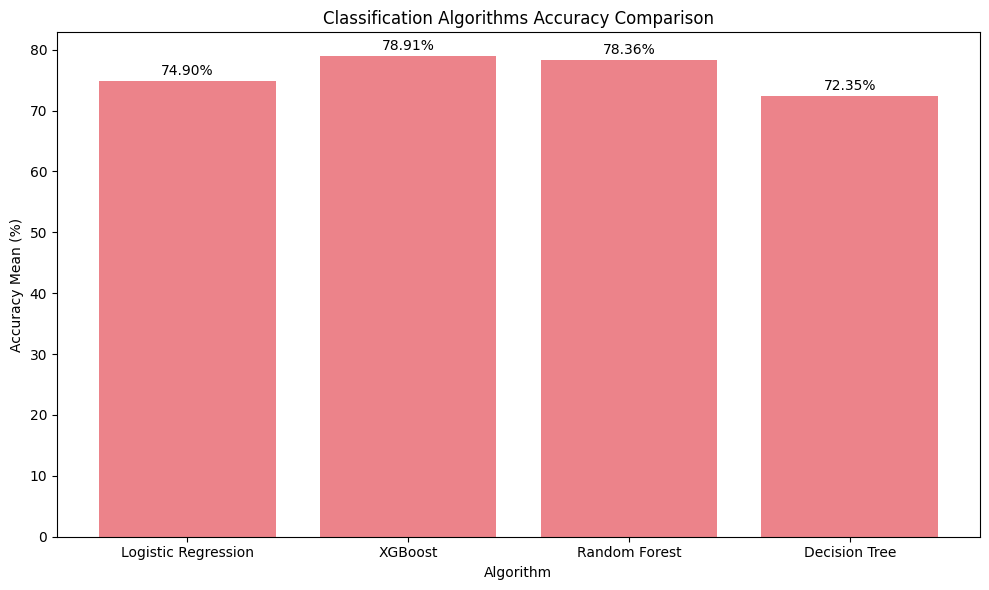

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(model_results['Algorithm'], model_results['Accuracy Mean'], color='#ec838a')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy Mean (%)")
plt.title("Classification Algorithms Accuracy Comparison")
plt.xticks(rotation=0, ha='center')  # Rotate x-axis labels for better readability


# Add value labels on top of the bars
for bar, value in zip(bars, model_results['Accuracy Mean']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,  f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


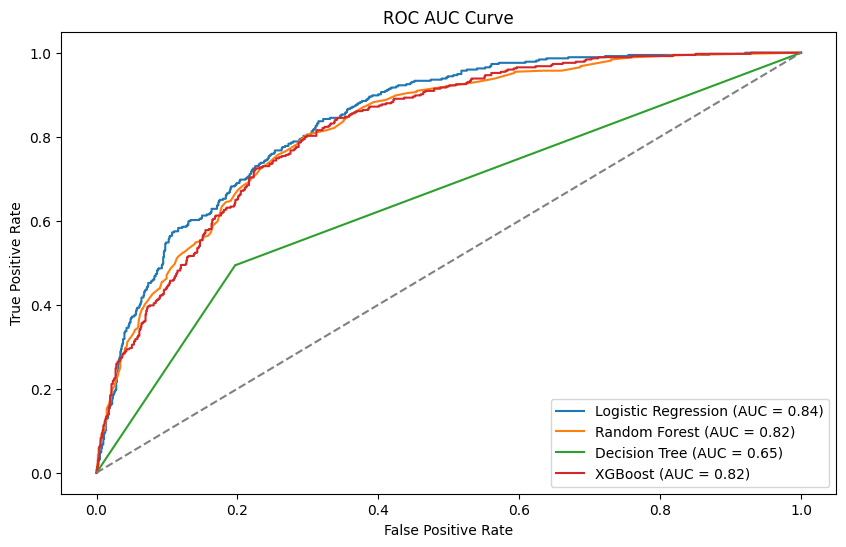

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

plt.figure(figsize=(10, 6))
for name, model in models:
    # Fit the model before predicting probabilities
    model.fit(X_train, y_train)


    from sklearn.metrics import roc_auc_score, roc_curve
    # Replace with actual model prediction probabilities
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

### 14.3.3 SMOTE Oversampling

Tahap oversampling ini dilakukan pada tahap setelah data split dan cross validation ROC_AUC Scoring. Lalu hanya diaplikasikan hanya pada training set. Hal tersebut dikarenakan kalau dilakukan pada tahap sebelum splitting dan Cross_validation maka akan merubah hasil validation menjadi 50: 50 sementara seharusnya yaitu sekitar 74 : 26.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import roc_auc_score, roc_curve

col_smote = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results_smote = pd.DataFrame(columns=col_smote)

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for i, (name, model) in enumerate(models):
    pipeline = Pipeline(steps=[
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

    scores = cross_validate(
        pipeline, X_train, y_train,
        cv=kfold,
        scoring=['roc_auc', 'accuracy'],
        return_train_score=False
    )

    model_results_smote.loc[i] = [
        name,
        round(scores['test_roc_auc'].mean() * 100, 2),
        round(scores['test_roc_auc'].std() * 100, 2),
        round(scores['test_accuracy'].mean() * 100, 2),
        round(scores['test_accuracy'].std() * 100, 2)
    ]

model_results_smote = model_results_smote.sort_values(by='ROC AUC Mean', ascending=False)
print(model_results_smote)

             Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  Accuracy STD
0  Logistic Regression         84.56         1.56          75.24          1.74
3              XGBoost         82.40         1.38          78.04          1.16
1        Random Forest         82.39         1.97          78.70          1.47
2        Decision Tree         67.61         2.09          73.43          1.39


**Kesimpulan**

Penerapan SMOTE tampaknya memberikan dampak positif pada kemampuan model untuk membedakan kelas (terutama terlihat pada peningkatan ROC AUC). Logistic Regression menunjukkan kinerja terbaik dalam hal ROC AUC, sementara Random Forest memiliki akurasi rata-rata tertinggi. XGBoost juga menunjukkan kinerja yang kompetitif. Decision Tree masih menjadi pilihan yang kurang baik.

### 14.3.4 Searching Optimum Number of Trees for Random Forest Model

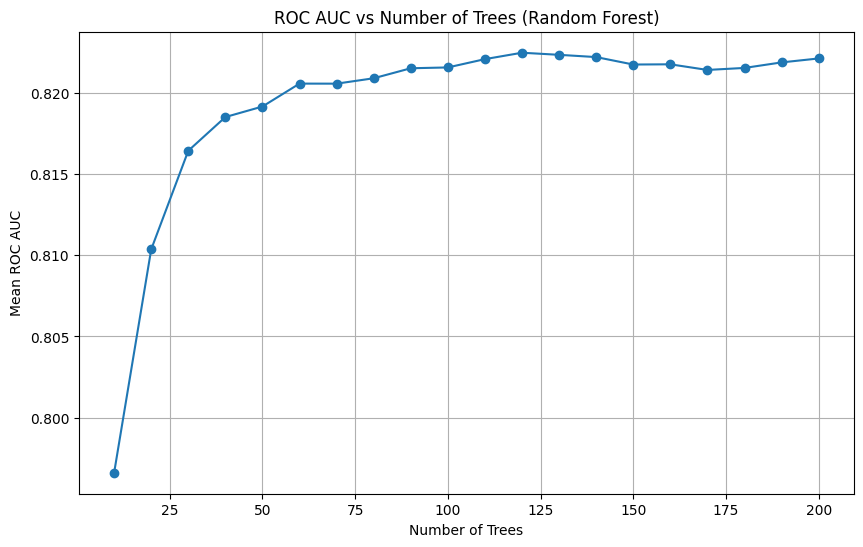

Best number of trees: 120 with ROC AUC = 0.82


In [ ]:
from sklearn.model_selection import cross_val_score

tree_range = range(10, 201, 10)
roc_auc_scores = []

for n in tree_range:
    model = RandomForestClassifier(n_estimators=n, random_state=42)

    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('rf', model)
    ])

    scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='roc_auc')
    roc_auc_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(tree_range, roc_auc_scores, marker='o', linestyle='-')
plt.title('ROC AUC vs Number of Trees (Random Forest)')
plt.xlabel('Number of Trees')
plt.ylabel('Mean ROC AUC')
plt.grid(True)
plt.show()

best_n = tree_range[np.argmax(roc_auc_scores)]
best_auc = max(roc_auc_scores)
print(f'Best number of trees: {best_n} with ROC AUC = {best_auc:.2f}')

**Kesimpulan**

Tujuan dari grafik ini adalah untuk mengidentifikasi jumlah pohon yang optimal, yaitu jumlah pohon yang memberikan kinerja terbaik (Mean ROC AUC tertinggi) dengan mempertimbangkan trade-off antara kinerja dan biaya komputasi (waktu pelatihan yang lebih lama dengan lebih banyak pohon).

Berdasarkan grafik ini, jumlah pohon di sekitar 100 hingga 150 tampaknya menjadi area di mana Mean ROC AUC mencapai nilai yang cukup tinggi dan mulai stabil. Menambahkan lebih banyak pohon di luar rentang ini mungkin tidak memberikan peningkatan kinerja yang substansial dan hanya akan meningkatkan waktu pelatihan model.



### 14.3.5 Compare Baseline Classification Algorithms

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

X = dataset.drop('Churn', axis=1)
y = dataset['Churn']

label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Dummy": DummyClassifier(strategy="most_frequent"),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}

def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results.append({
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
            "Recall": recall_score(y_test, y_pred, average='weighted'),
            "F2 Score": fbeta_score(y_test, y_pred, average='weighted', beta=2) # Use fbeta_score with beta=2 for F2 score
        })
    return pd.DataFrame(results).sort_values(by="F2 Score", ascending=False)

baseline_results = evaluate_models(models, X_train, X_test, y_train, y_test)
print("Baseline Model Comparison:")
print(baseline_results)

log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)

log_reg_results = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_log_reg),
    "Precision": precision_score(y_test, y_pred_log_reg, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_log_reg, average='weighted'),
    "F2 Score": fbeta_score(y_test, y_pred_log_reg, average='weighted', beta=2) # Use fbeta_score with beta=2
}
print("\nLogistic Regression Results:")
print(log_reg_results)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

dt_results = {
    "Model": "Decision Tree",
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "Precision": precision_score(y_test, y_pred_dt, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_dt, average='weighted'),
    "F2 Score": fbeta_score(y_test, y_pred_log_reg, average='weighted', beta=2)
}
print("\nDecision Tree Results:")
print(dt_results)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rf_results = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_rf, average='weighted'),
    "F2 Score": fbeta_score(y_test, y_pred_log_reg, average='weighted', beta=2)
}
print("\nRandom Forest Results:")
print(rf_results)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Baseline Model Comparison:
                 Model  Accuracy  Precision    Recall  F2 Score
1  Logistic Regression  0.820440   0.814521  0.820440  0.818578
3        Random Forest  0.805536   0.794601  0.805536  0.800259
2        Decision Tree  0.726757   0.732249  0.726757  0.727730
4          Naive Bayes  0.697658   0.807667  0.697658  0.694755
0                Dummy  0.735273   0.540627  0.735273  0.685884


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Results:
{'Model': 'Logistic Regression', 'Accuracy': 0.8204400283889283, 'Precision': 0.8145209382819908, 'Recall': 0.8204400283889283, 'F2 Score': 0.8185775740612024}

Decision Tree Results:
{'Model': 'Decision Tree', 'Accuracy': 0.7132718239886444, 'Precision': 0.7223139128307197, 'Recall': 0.7132718239886444, 'F2 Score': 0.8185775740612024}

Random Forest Results:
{'Model': 'Random Forest', 'Accuracy': 0.7977288857345636, 'Precision': 0.7861482828479128, 'Recall': 0.7977288857345636, 'F2 Score': 0.8185775740612024}


### 14.3.6 Visualize the results and compare the baseline algorithms

In [ ]:
# Visualize the results and compare the baseline algorithms----------------------------------

# =======================================================================================================================
# Sort results based on the right classification metric:
# (Accuracy/ROC_AUC / Precision/Recall/F1/F2 scores)

# Since we have class imbalance. When we look into the business challenge,
# our false negatives will be costly and hence we need to Keep an eye onto the Precision, Recall & F2 score besides accuracy
# =======================================================================================================================

# Assuming 'baseline_results' is the DataFrame to be sorted
baseline_results = baseline_results.sort_values(
    ["Precision", "Recall", "F2 Score"],
    ascending=False
)

print(baseline_results)

                 Model  Accuracy  Precision    Recall  F2 Score
1  Logistic Regression  0.820440   0.814521  0.820440  0.818578
4          Naive Bayes  0.697658   0.807667  0.697658  0.694755
3        Random Forest  0.805536   0.794601  0.805536  0.800259
2        Decision Tree  0.726757   0.732249  0.726757  0.727730
0                Dummy  0.735273   0.540627  0.735273  0.685884


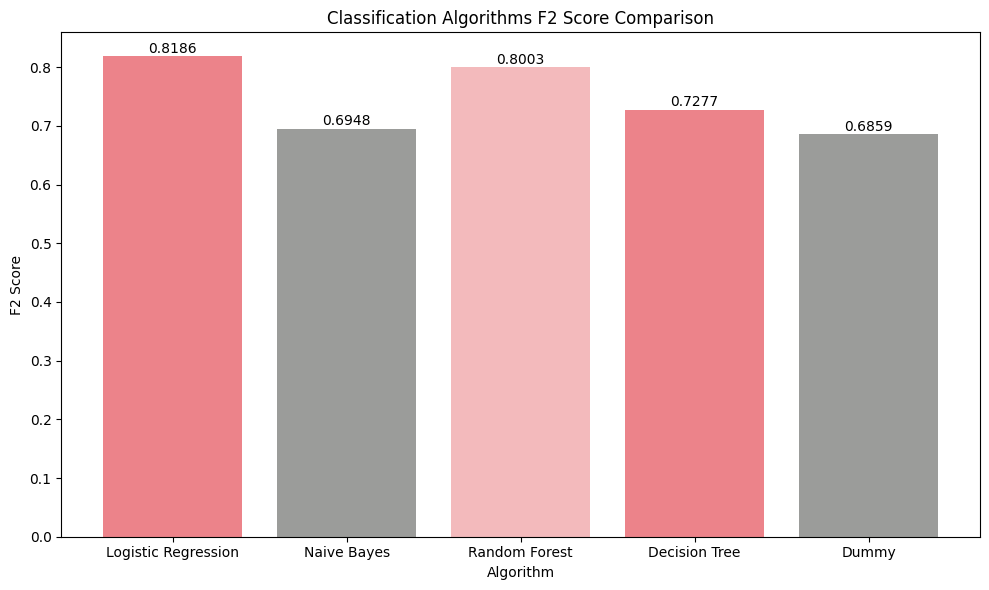

In [ ]:
# prompt:  Visualize the results and compare the baseline algorithms
#  Sort results based on the right classification metric:
#  (Accuracy/ROC_AUC / Precision/Recall/F1/F2 scores)
#  Since we have class imbalance. When we look into the business challenge,
#  our false negatives will be costly and hence we need to Keep an eye onto the Precision, Recall & F2 score besides accuracy


plt.figure(figsize=(10, 6))
models = baseline_results['Model']
f2_scores = baseline_results['F2 Score']

bars = plt.bar(models, f2_scores, color=['#ec838a', '#9b9c9a', '#f3babc', '#ec838a', '#9b9c9a'])

# Add value labels on top of the bars
for bar, value in zip(bars, f2_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.001, f'{value:.4f}', ha='center', va='bottom')

plt.xlabel("Algorithm")
plt.ylabel("F2 Score")
plt.title("Classification Algorithms F2 Score Comparison")
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()


**Kesimpulan:**

Dari perbandingan F2 Score ini, Logistic Regression menunjukkan kinerja terbaik dalam menyeimbangkan Precision dan Recall dengan memberikan bobot lebih pada Recall. Random Forest juga menunjukkan kinerja yang sangat baik dan kompetitif. Decision Tree menunjukkan kinerja yang moderat, sementara Naive Bayes dan Dummy memiliki kinerja yang lebih rendah.

**Insight:**

- Untuk tugas klasifikasi ini, model Logistic Regression dan Random Forest tampaknya menjadi pilihan yang lebih baik jika metrik F2 Score (yang menekankan Recall) adalah prioritas.
- Kinerja Naive Bayes perlu dipertimbangkan lebih lanjut. Mungkin perlu dilakukan tuning parameter atau mempertimbangkan apakah asumsi independensi fitur dari Naive Bayes terpenuhi dalam dataset ini.
- Kinerja rendah dari Dummy mengkonfirmasi bahwa algoritma-algoritma machine learning yang digunakan memang belajar pola dari data dan memberikan hasil yang jauh lebih baik daripada prediksi acak.

## 15.&nbsp;Train & Evaluate Chosen Model

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



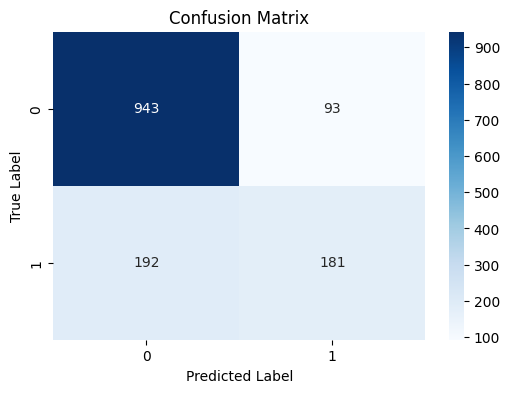

   Actual  Predicted
0       1          1
1       0          0
2       0          0
3       1          1
4       0          0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

**Kesimpulan dan Insight:**

Model memiliki akurasi yang lumayan tinggi (sekitar 79.77%). Namun, akurasi bisa menyesatkan jika kelasnya tidak seimbang.
Presisi model cukup baik (sekitar 66.06%), yang berarti ketika model memprediksi kelas positif, kemungkinan itu benar cukup tinggi.
Recall model relatif rendah (sekitar 48.53%), yang berarti model kesulitan mengidentifikasi semua instance positif yang sebenarnya. Banyak instance positif yang salah diprediksi sebagai negatif.
F1-score yang moderat (sekitar 55.90%) mencerminkan trade-off antara presisi dan recall.

AUC Score: 0.82


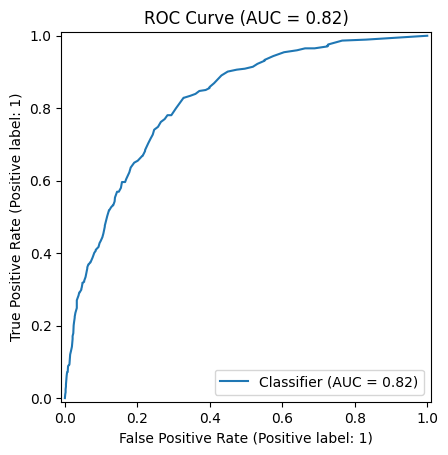

In [ ]:
y_probs = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score:.2f}")
RocCurveDisplay.from_predictions(y_test, y_probs)
plt.title(f'ROC Curve (AUC = {auc_score:.2f})')
plt.show()

**Kesimpulan dan Insight:**

- Kinerja Model Baik: Nilai AUC sebesar 0.82 menunjukkan bahwa model klasifikasi ini memiliki kinerja yang baik dalam memisahkan antara kelas positif dan negatif. Ada kemungkinan besar bahwa model akan memberikan peringkat yang lebih tinggi pada instance positif dibandingkan instance negatif.
- Trade-off TPR dan FPR: Bentuk kurva menunjukkan trade-off antara TPR dan FPR pada berbagai ambang batas.
 - Pada FPR yang rendah, TPR juga relatif rendah. Untuk mendapatkan TPR yang lebih tinggi, kita harus menerima FPR yang lebih tinggi.
 - Bagian curam dari kurva di awal menunjukkan bahwa model dapat mencapai TPR yang cukup tinggi dengan FPR yang relatif rendah pada ambang batas tertentu.
 - Saat FPR meningkat, peningkatan TPR mulai melambat, menunjukkan diminishing returns dalam meningkatkan true positives dengan mengorbankan lebih banyak false positives.
- Perbandingan dengan Klasifikasi Acak: AUC 0.82 jauh di atas 0.5, mengindikasikan bahwa model secara signifikan lebih baik daripada tebakan acak.

## 16.&nbsp;Analysis

---



Classification Report Before Oversampling:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409


Classification Report After Oversampling:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.61      0.54      0.57       373

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix Before Oversampling:
[[939  97]
 [189 184]]

Confusion Matrix After Oversampling:
[[909 127]
 [172 201]]


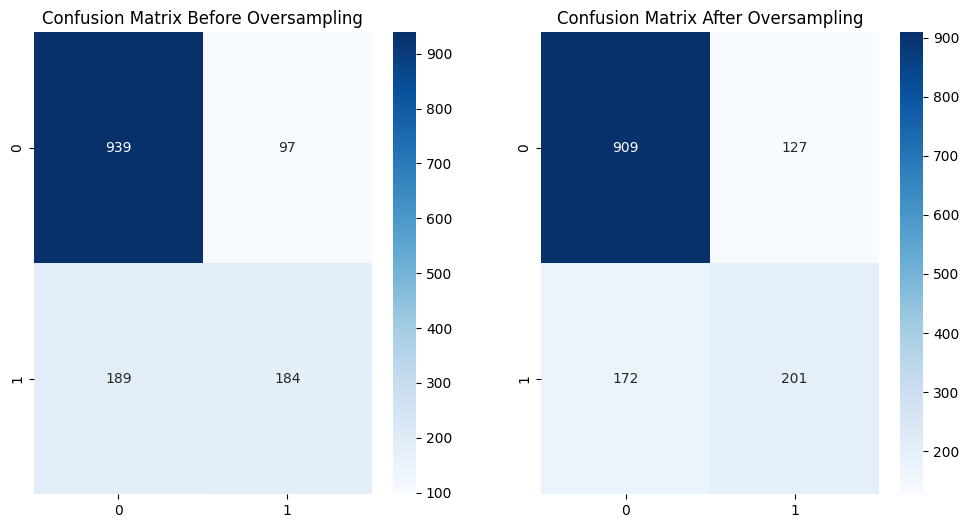

AUC Score Before Oversampling: 0.84
AUC Score After Oversampling: 0.84


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier()
model.fit(X_train, y_train)

model_sm = RandomForestClassifier()
model_sm.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)
y_pred_sm = model_sm.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_sm = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_sm})

print('Classification Report Before Oversampling:')
print(classification_report(y_test, y_pred))
print()
print('Classification Report After Oversampling:')
print(classification_report(y_test, y_pred_sm))

print('Confusion Matrix Before Oversampling:')
print(confusion_matrix(y_test, y_pred))
print()
print('Confusion Matrix After Oversampling:')
print(confusion_matrix(y_test, y_pred_sm))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Before Oversampling')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_sm), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix After Oversampling')
plt.show()

y_probs = model.predict_proba(X_test)[:, 1]
y_probs_sm = model_sm.predict_proba(X_test)[:, 1]

auc_score_before = roc_auc_score(y_test, y_probs)
auc_score_after = roc_auc_score(y_test, y_probs_sm)

print(f'AUC Score Before Oversampling: {auc_score_before:.2f}')
print(f'AUC Score After Oversampling: {auc_score_after:.2f}')

Apa insight yang bisa didapat dengan handling data imbalance pada data diatas? Teknik apa yang anda gunakan? Jelaskan!

Answer:

1. Insight: Setelah menggunakan SMOTE, model menunjukkan peningkatan dalam memprediksi kelas minoritas dan mengurangi bias terhadap kelas mayoritas, sehingga model menjadi lebih sensitif terhadap kelas minoritas.

2. Teknik yang Digunakan: Teknik SMOTE digunakan untuk menghasilkan contoh sintetis pada kelas minoritas, sementara Random Forest digunakan untuk klasifikasi sebelum dan setelah oversampling, dan evaluasi kinerja dilakukan menggunakan confusion matrix, classification report, serta AUC.